# Urban Sounds Classification
## Koç Holding Derin Öğrenme Bootcamp
### DLTR takımı projesi
#### Önişleme

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import time
import cv2
from sklearn.model_selection import train_test_split

In [9]:
PATH = "/content/drive/MyDrive/Deep Learning/"

In [10]:
df = pd.read_csv(PATH + "metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
fold_number = np.array(df["fold"])
file_name = np.array(df["slice_file_name"])
class_name = np.array(df["class"])

In [5]:
def create_spectrogram(file_path):
    data, sampling_rate = librosa.load(file_path)
    out=librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    return out

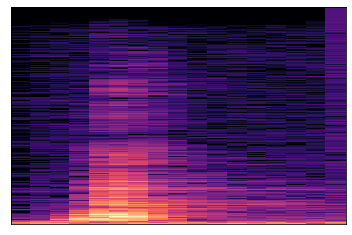

In [11]:
testpath = PATH + "audio/fold1/43786-3-1-0.wav"
testspec = create_spectrogram(testpath)
librosa.display.specshow(testspec)

In [7]:
audio_path = PATH + "/audio"
print(audio_path)
print(len(file_name))

/content/drive/MyDrive/Deep Learning/audio
8732


### Spectrogram'a dönüştürme

In [ ]:
for i in range(len(file_name)):
  file_path = audio_path + "/fold" + str(fold_number[i]) + "/" +file_name[i]
  fig=plt.figure()
  librosa.display.specshow(create_spectrogram(file_path))
  fig.savefig(file_path[:-3]+"png")
  plt.close(fig)
  time.sleep(0.005)

### Görüntüleri sırasıyla okuma, grayscale'ye dönüştürme, resizing ve normalizasyon

In [8]:
spectrogram = []
label = []
classID = df["classID"]
for i in range(len(classID)):
    file_path = audio_path + "/fold" + str(fold_number[i]) + "/" +file_name[i]
    image_path = file_path[:-3] + "png"
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img,(64, 64), interpolation = cv2.INTER_AREA)
    normalized_img = resized_img / 255
    spectrogram.append(normalized_img)
    label.append(classID[i])

### Görüntüleri ait oldukları etiketlerle birlikte eklenen liste ( [görüntü, etiket] => [Spectrogram, label] )

In [12]:
data = pd.DataFrame({"Spectrogram":spectrogram, "Label":classID})
data.head()

,Spectrogram,Label
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",3
1,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",2
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",2
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",2
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",2


In [13]:
print(len(data["Spectrogram"]))
print(data["Spectrogram"][100].shape)

8732
(64, 64)


### X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini oluşturma

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data["Spectrogram"], data["Label"], test_size=0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5,random_state=42)

In [15]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of X_validation: {len(X_val)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_validation: {len(y_val)}")

Length of X_train: 6985
Length of X_test: 874
Length of X_validation: 873
Length of y_train: 6985
Length of y_test: 874
Length of y_validation: 873


### Veri setlerini bilgisayara kaydetme

In [16]:
X_train.to_pickle(PATH + "X_train")
X_test.to_pickle(PATH + "X_test")
X_val.to_pickle(PATH + "X_validation")

y_train.to_pickle(PATH + "y_train")
y_test.to_pickle(PATH + "y_test")
y_val.to_pickle(PATH + "y_validation")